In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model, load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import pickle
from google.colab import drive
from imblearn.over_sampling import SMOTE  # Handling imbalanced data

# 🚀 Step 1: Mount Google Drive (if using Colab)
drive.mount('/content/drive')

# 🔹 Define paths in Google Drive
MODEL_PATH = "/content/drive/MyDrive/model6_VGG16.keras"
DATASET_PATH = "/content/drive/MyDrive/Colab Notebooks/fake currency/datasetnew"
SAVED_RF_PATH = "/content/drive/MyDrive/Colab Notebooks/custom_algorithms/modelrf/rf_model.pkl"
SAVED_SCALER_PATH = "/content/drive/MyDrive/Colab Notebooks/custom_algorithms/modelrf/scaler.pkl"

# 🚀 Step 2: Load Pretrained VGG16 Model
try:
    base_model = load_model(MODEL_PATH)
    print("✅ Loaded trained VGG16 model!")
except:
    base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
    print("⚠️ Using default pre-trained VGG16 model!")

# Extract features from last convolutional layer
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)




# ... (rest of your code) ...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded trained VGG16 model!


In [6]:
# 🚀 Step 3: Load Dataset and Extract Features
image_paths = []  # Fill with paths to images
labels = []  # Fill with corresponding labels
X = []  # Initialize X to store features
y = []  # Initialize y to store labels

# Example:
# Assuming your images are in DATASET_PATH and organized into subfolders for each class
for class_name in os.listdir(DATASET_PATH):
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            # Load and preprocess the image
            img = load_img(image_path, target_size=(224, 224))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

            # Extract features
            features = feature_extractor.predict(img_array).flatten()
            X.append(features)  # Append features to X
            y.append(class_name)  # Append label to y

            image_paths.append(image_path)  # Append image path if needed
            labels.append(class_name)  # Append label if needed


X = np.array(X)  # Convert X to NumPy array
y = np.array(y)  # Convert y to NumPy array

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 935ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 947ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484

In [7]:


# 🚀 Step 4: Handle Class Imbalance (Optional)
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# 🚀 Step 5: Train Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Standardize Data (Recommended for better performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
import os

# ... (Your existing code) ...

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(SAVED_SCALER_PATH), exist_ok=True)

# Save Scaler
with open(SAVED_SCALER_PATH, 'wb') as f:
    pickle.dump(scaler, f)

In [11]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save Model
with open(SAVED_RF_PATH, 'wb') as f:
    pickle.dump(rf, f)

print("✅ Random Forest model trained and saved!")

✅ Random Forest model trained and saved!


In [12]:
# 🚀 Step 6: Predict & Evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {accuracy * 100:.2f}%")

# 🚀 Step 7: Load & Use Model (If Needed)
with open(SAVED_RF_PATH, 'rb') as f:
    rf_loaded = pickle.load(f)

🎯 Accuracy: 93.09%


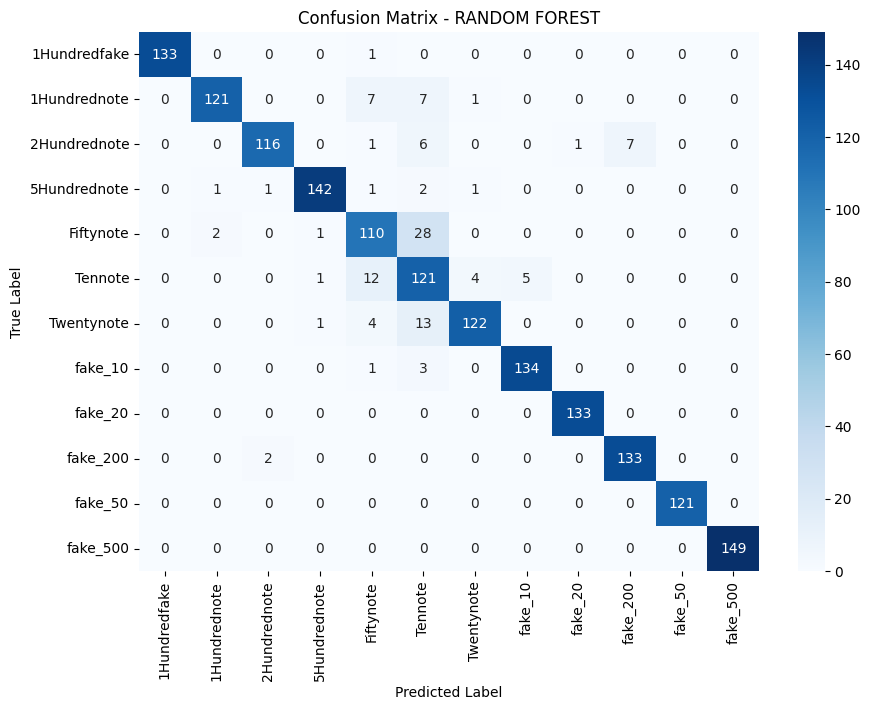

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# ✅ Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Define Class Labels (Ensure this matches your dataset)
category_names = list(class_indices.keys())  # Use actual category names

# ✅ Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=category_names, yticklabels=category_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - RANDOM FOREST")
plt.show()

In [17]:
target_names = [k for k, v in class_indices.items() if v in unique_classes]

In [18]:
# Classification Report
from sklearn.metrics import classification_report

# Get unique classes from y_test
unique_classes = np.unique(y_test)

# Create a dictionary mapping class names to indices
class_indices = {class_name: index for index, class_name in enumerate(unique_classes)}

# ✅ Fix: Get class names directly from unique_classes
target_names = list(unique_classes)

# Generate classification report using target_names
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
               precision    recall  f1-score   support

1Hundredfake       1.00      0.99      1.00       134
1Hundrednote       0.98      0.89      0.93       136
2Hundrednote       0.97      0.89      0.93       131
5Hundrednote       0.98      0.96      0.97       148
   Fiftynote       0.80      0.78      0.79       141
     Tennote       0.67      0.85      0.75       143
  Twentynote       0.95      0.87      0.91       140
     fake_10       0.96      0.97      0.97       138
     fake_20       0.99      1.00      1.00       133
    fake_200       0.95      0.99      0.97       135
     fake_50       1.00      1.00      1.00       121
    fake_500       1.00      1.00      1.00       149

    accuracy                           0.93      1649
   macro avg       0.94      0.93      0.93      1649
weighted avg       0.94      0.93      0.93      1649



In [21]:
# Predict on a new image
def predict_new_image(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

    features = feature_extractor.predict(img_array).flatten()
    features = scaler.transform([features])  # Apply scaling

    prediction = rf_loaded.predict(features)
    return prediction[0]
